In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp, quad

In [8]:
# Set precision for mpmath
mp.dps = 100  # Set decimal precision to 50 digits

In [46]:
# Define constants with high precision
m = mp.mpf(9.11e-31)            # mass of electron (kg)
m_star = 0.3 * m                # effective mass of electron (kg)
e = mp.mpf(1.6e-19)             # charge of electron (C)
epsilon_0 = mp.mpf(8.85e-12)    # permittivity of free space (F/m)
hbar = mp.mpf(1.05e-34)         # reduced Planck's constant (J·s)
epsilon_b = mp.mpf(8.9)        # dielectric constant of the background material

In [53]:
d = mp.mpf(1e-10)                # distance between 2D electron gas and impurities (m)
n_2DEG = mp.mpf(1e17)           # 2D electron density (m^-2)
n_imp = mp.mpf(1e22)            # impurity density (m^-3)

k_F = mp.sqrt(2 * mp.pi * n_2DEG)  # Fermi wavevector (m^-1)
b = mp.power(33*m_star* (e**2) *n_2DEG/(8* (hbar**2) *epsilon_0*epsilon_b),1/3)
# b = mp.cbrt(33*m_star* (e**2) *n_2DEG/(8* (hbar**2) *epsilon_0*epsilon_b))
q_TF = mp.mpf(m_star* (e**2)/(2*mp.pi*epsilon_0*epsilon_b*hbar**2) )             # Thomas-Fermi screening length (m)

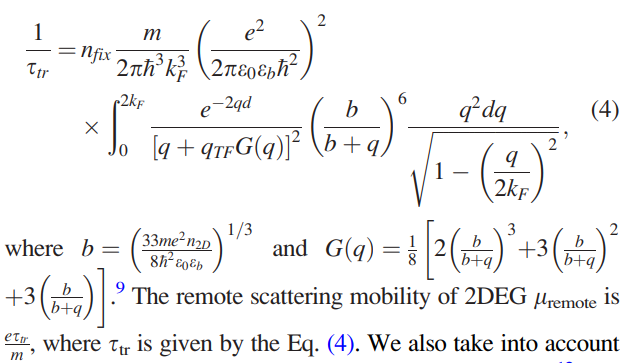

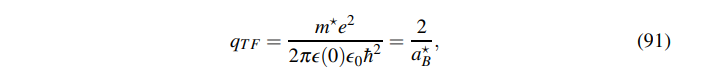

In [54]:
def G(q, b):
    t = b / (b + q)
    # term1 = 2 * (b / (b + q)) ** 3
    # term2 = 3 * (b / (b + q)) ** 2
    # term3 = 3 * (b / (b + q))
    # return (1 / 8) * (term1 + term2 + term3)
    return (1/8)*(2*t**3 + 3*t**2 + 3*t)


# Define the integrand
def integrand(q, b, k_F):
    term1 = mp.exp(-2*q*d)/(q + q_TF*G(q, b))**2
    term2 = (b/(b+q))**6
    term3 = q**2/mp.sqrt(1 - (q/(2*k_F))**2)
    return term1 * term2 * term3
    # numerator = mp.exp(-2*q*d) * (b/(b+q))**6
    # denominator = (q + q_TF*G(q, b))**2
    # factor = (q**2) / mp.sqrt(1 - (q/(2*k_F))**2)
    # return (numerator / denominator) * factor

In [55]:
result= quad(lambda q: integrand(q, b, k_F), [0, 2*k_F])

# prefactor = (n_imp * m_star) / (2 * mp.pi * (hbar*k_F)**3) * (e**2/(2*epsilon_0*epsilon_b*hbar**2))**2
# prefactor = (n_imp * m_star * e**4) / (2 * mp.pi * (hbar*k_F)**3 * 2*epsilon_0)
prefactor = (n_imp * m_star * e**4) / (8 * mp.pi**3 * hbar**3 * k_F**3 * epsilon_0**2 * epsilon_b**2)


# Compute 1/tau
tau_inverse = prefactor * result
tau = 1/tau_inverse

# Print results
print(f"1/tau = {tau_inverse}")


print(f"1/tau = {float(tau_inverse):.3e}")
print(f"tau = {float(1/tau_inverse):.3e}")
print(f"mobility = {float(e*tau/m_star*1e4):.3e} cm^2/V-s")

1/tau = 65294319755609140.31351298468609616071844425836137015178269080835370172714917059061141554481024294257
1/tau = 6.529e+16
tau = 1.532e-17
mobility = 8.966e-02 cm^2/V-s


In [ ]:
# Set precision for mpmath
mp.dps = 50  # Set decimal precision to 50 digits

# Define constants with high precision
m = mp.mpf(9.11e-31)            # mass of electron (kg)
m_star = 0.3 * m                # effective mass of electron (kg)
e = mp.mpf(1.6e-19)             # charge of electron (C)
epsilon_0 = mp.mpf(8.85e-12)    # permittivity of free space (F/m)
hbar = mp.mpf(1.05e-34)         # reduced Planck's constant (J·s)
n_2DEG = mp.mpf(1e17)           # 2D electron density (m^-2)
n_imp = mp.mpf(1e19)            # impurity density (m^-3)
k_F = mp.sqrt(2 * mp.pi * n_2DEG)  # Fermi wavevector (m^-1)
b = mp.mpf(7e9)                 # some constant parameter (m)
d = mp.mpf(1e-9)                # distance between 2D electron gas and impurities (m)
# Define G(q) as in Eq. (9.67)
def G(q, b):
    term1 = 2 * (b / (b + q)) ** 3
    term2 = 3 * (b / (b + q)) ** 2
    term3 = 3 * (b / (b + q))
    return (1 / 8) * (term1 + term2 + term3)

# Define the integrand
def integrand(q, b, k_F):
    q_TF = mp.mpf(1)  # Thomas-Fermi screening length (example value)
    numerator = mp.exp(-2 * q * d) * (b / (b + q))**6
    denominator = (q + q_TF * G(q, b)) ** 2
    factor = (q ** 2) / mp.sqrt(1 - (q / (2 * k_F)) ** 2)
    return (numerator / denominator) * factor

# Perform the numerical integration using mpmath's quad
result = quad(lambda q: integrand(q, b, k_F), [0, 2 * k_F])

# Compute the prefactor
prefactor = (n_imp * m_star) / (2 * mp.pi * hbar**3 * k_F**2) * (e**2 / (2 * epsilon_0))

# Compute 1/tau
tau_inverse = prefactor * result

# Print results
print(f"1/tau = {tau_inverse}")


print(f"1/tau = {float(tau_inverse):.3e}")
print(f"Integration error = {error:.3e}")
print(f"tau ={float(1/tau_inverse):.3e}")


1/tau = 3.2657711511135820814377206432799980216496778885461e+53
1/tau = 3.266e+53
Integration error = 0.000e+00
tau =3.062e-54


mobility = 5.378e-43 m^2/Vs


1/tau = 1845327714425002.761272838283870915737279345006349846552493158897171138206461706554785714526375599429
1/tau = 1.845e+15
tau = 5.419e-16
mobility = 2.974e+00 cm^2/V-s


In [12]:
tau_inverse_prime = np.pi * hbar * n_2DEG/ (8 * m_star * (k_F*d)**3)
print(f"1/tau = {float(tau_inverse_prime):.3e}")

1/tau = 6.209e+08
